In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier

# Set plot style
sns.set(style="whitegrid")

try:
    X_train = pd.read_csv('../data/processed/X_train.csv')
    y_train = pd.read_csv('../data/processed/y_train.csv').values.ravel() # .values.ravel() is used to format y_train correctly
    print("Processed training data loaded successfully!")
    print("X_train shape:", X_train.shape)
except FileNotFoundError:
    print("Error: Processed data not found.")

Processed training data loaded successfully!
X_train shape: (736, 22)


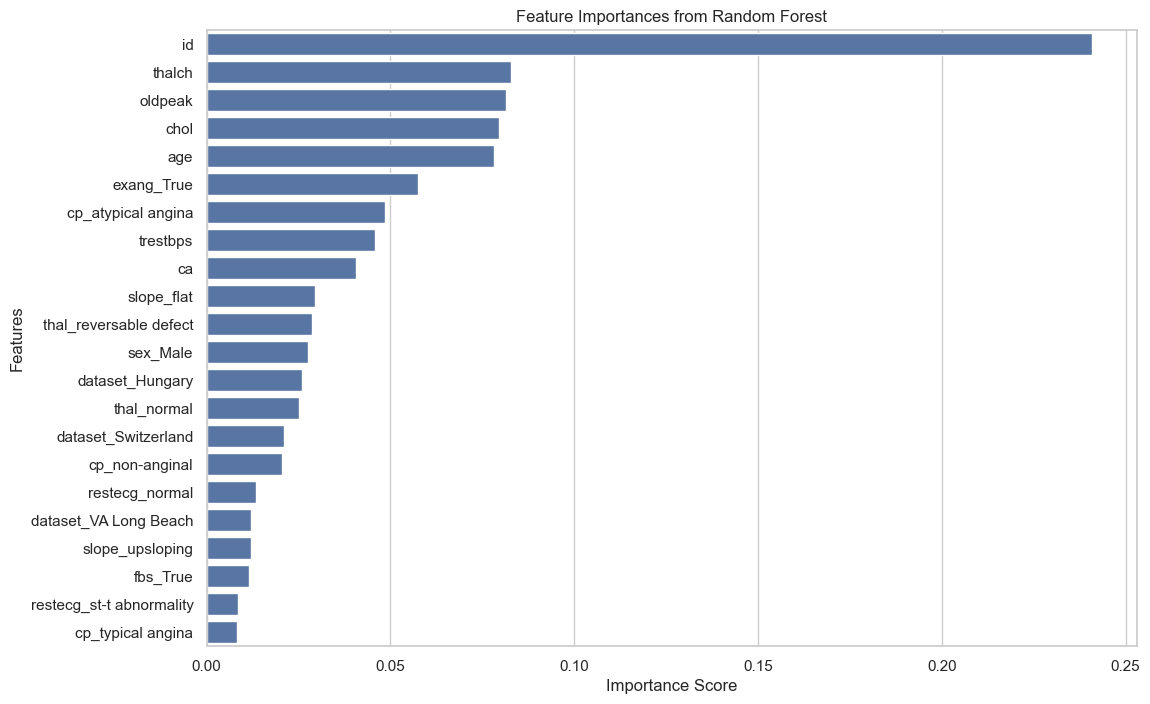

In [2]:
# Create a Random Forest classifier to find feature importances
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

# Get feature importances
importances = forest.feature_importances_

# Create a pandas Series for easier manipulation
feature_importances = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [3]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# --- Step 1: Remove the 'id' column ---
print(f"Original number of features: {X_train.shape[1]}")
if 'id' in X_train.columns:
    X_train = X_train.drop('id', axis=1)
    print("Dropped 'id' column to prevent data leakage.")
    print(f"New number of features: {X_train.shape[1]}")

# --- Step 2: Use RFE to select the top 10 features ---
# We'll use a simple Logistic Regression model for this process
estimator = LogisticRegression(max_iter=1000, random_state=42)

# Initialize RFE to select the best 10 features
selector = RFE(estimator, n_features_to_select=10, step=1)

# Fit RFE on our training data
selector = selector.fit(X_train, y_train)

# Get the list of selected features
selected_features = X_train.columns[selector.support_]

print("\nTop 10 features selected by RFE:")
print(list(selected_features))

Original number of features: 22
Dropped 'id' column to prevent data leakage.
New number of features: 21

Top 10 features selected by RFE:
['ca', 'sex_Male', 'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina', 'exang_True', 'slope_flat', 'thal_normal']
